# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Uploading Datasets

In [3]:
data=pd.read_csv("compresive_strength_concrete.csv")

In [4]:
data.shape

(1030, 9)

In [5]:
data.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [6]:
data.isnull().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

In [7]:
np.where(data.applymap(lambda x: x == ''))

(array([], dtype=int64), array([], dtype=int64))

In [8]:
X_train = data.sample(frac = 0.7, random_state = 123)
X_test = data.drop(X_train.index)

In [9]:
X_train.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
134,362.6,189.0,0.0,164.9,11.6,944.7,755.8,28,71.30
13,190.0,190.0,0.0,228.0,0.0,932.0,670.0,90,42.33
996,152.6,238.7,0.0,200.0,6.3,1001.8,683.9,28,26.86
770,349.0,0.0,0.0,192.0,0.0,1047.0,806.0,3,14.99
937,313.3,0.0,113.0,178.5,8.0,1001.9,688.7,28,36.80


# Assigning features and target variable

In [10]:
Y_train = X_train.iloc[:,-1]
X_train = X_train.iloc[:,0:-1]
Y_test = X_test.iloc[:,-1]
X_test = X_test.iloc[:,0:-1]

In [11]:
X_mean = X_train.mean()
X_train -= X_mean
X_std = X_train.std()
X_train /= X_std
X_test -= X_mean
X_test /= X_std

In [12]:
Y_mean = Y_train.mean()
Y_train -= Y_mean
Y_std = Y_train.std()
Y_train /= Y_std
Y_test -= Y_mean
Y_test /= Y_std

In [13]:
X_train.dtypes

Cement (component 1)(kg in a m^3 mixture)                float64
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    float64
Fly Ash (component 3)(kg in a m^3 mixture)               float64
Water  (component 4)(kg in a m^3 mixture)                float64
Superplasticizer (component 5)(kg in a m^3 mixture)      float64
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     float64
Fine Aggregate (component 7)(kg in a m^3 mixture)        float64
Age (day)                                                float64
dtype: object

In [14]:
X_train = X_train.to_numpy()
Y_train = Y_train.to_numpy()
X_test = X_test.to_numpy()
Y_test = Y_test.to_numpy()

# Model selection

In [15]:
from tensorflow.keras import layers as L
from tensorflow.keras import models as M

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWarning: Passi

In [16]:
network = M.Sequential()

In [17]:
network.add(L.Dense(128,activation="relu",input_shape=(X_train.shape[1],)))

Instructions for updating:
Colocations handled automatically by placer.


In [18]:
network.add(L.Dense(64,activation="relu"))

In [19]:
network.add(L.Dense(32,activation="relu"))

In [20]:
network.add(L.Dense(1))

In [21]:
network.compile(optimizer="rmsprop",loss=["mse"],metrics=["mae"])

Instructions for updating:
Use tf.cast instead.


In [22]:
history = network.fit(X_train,Y_train,epochs=200,validation_split=0.3, batch_size = 16)

Train on 504 samples, validate on 217 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/200
504/504 [==============================] - 0s 810us/sample - loss: 0.5892 - mean_absolute_error: 0.6052 - val_loss: 0.4532 - val_mean_absolute_error: 0.5254
Epoch 2/200
504/504 [==============================] - 0s 187us/sample - loss: 0.3215 - mean_absolute_error: 0.4475 - val_loss: 0.3545 - val_mean_absolute_error: 0.4550
Epoch 3/200
504/504 [==============================] - 0s 263us/sample - loss: 0.2389 - mean_absolute_error: 0.3803 - val_loss: 0.2890 - val_mean_absolute_error: 0.4061
Epoch 4/200
504/504 [==============================] - 0s 196us/sample - loss: 0.1907 - mean_absolute_error: 0.3347 - val_loss: 0.2847 - val_mean_absolute_error: 0.4081
Epoch 5/200
504/504 [==============================] - 0s 198us/sample - loss: 0.1720 - mean_absolute_error: 0.3190 - val_loss: 0.2565 - val_mean_absolute_error: 0.3857
Epoch 6/200
504/504 [==============================] - 0s 218

504/504 [==============================] - 0s 228us/sample - loss: 0.0456 - mean_absolute_error: 0.1532 - val_loss: 0.1235 - val_mean_absolute_error: 0.2626
Epoch 48/200
504/504 [==============================] - 0s 178us/sample - loss: 0.0412 - mean_absolute_error: 0.1507 - val_loss: 0.1416 - val_mean_absolute_error: 0.2908
Epoch 49/200
504/504 [==============================] - 0s 244us/sample - loss: 0.0413 - mean_absolute_error: 0.1492 - val_loss: 0.1380 - val_mean_absolute_error: 0.2794
Epoch 50/200
504/504 [==============================] - 0s 181us/sample - loss: 0.0452 - mean_absolute_error: 0.1609 - val_loss: 0.1272 - val_mean_absolute_error: 0.2642
Epoch 51/200
504/504 [==============================] - 0s 198us/sample - loss: 0.0400 - mean_absolute_error: 0.1467 - val_loss: 0.1386 - val_mean_absolute_error: 0.2838
Epoch 52/200
504/504 [==============================] - 0s 226us/sample - loss: 0.0377 - mean_absolute_error: 0.1387 - val_loss: 0.1727 - val_mean_absolute_error: 

504/504 [==============================] - 0s 214us/sample - loss: 0.0266 - mean_absolute_error: 0.1119 - val_loss: 0.1470 - val_mean_absolute_error: 0.2845
Epoch 96/200
504/504 [==============================] - 0s 187us/sample - loss: 0.0284 - mean_absolute_error: 0.1212 - val_loss: 0.1213 - val_mean_absolute_error: 0.2509
Epoch 97/200
504/504 [==============================] - 0s 209us/sample - loss: 0.0269 - mean_absolute_error: 0.1156 - val_loss: 0.1211 - val_mean_absolute_error: 0.2590
Epoch 98/200
504/504 [==============================] - 0s 223us/sample - loss: 0.0295 - mean_absolute_error: 0.1160 - val_loss: 0.1217 - val_mean_absolute_error: 0.2597
Epoch 99/200
504/504 [==============================] - 0s 192us/sample - loss: 0.0249 - mean_absolute_error: 0.1142 - val_loss: 0.1153 - val_mean_absolute_error: 0.2462
Epoch 100/200
504/504 [==============================] - 0s 198us/sample - loss: 0.0296 - mean_absolute_error: 0.1154 - val_loss: 0.1216 - val_mean_absolute_error:

504/504 [==============================] - 0s 175us/sample - loss: 0.0215 - mean_absolute_error: 0.1011 - val_loss: 0.1201 - val_mean_absolute_error: 0.2437
Epoch 144/200
504/504 [==============================] - 0s 220us/sample - loss: 0.0254 - mean_absolute_error: 0.1060 - val_loss: 0.1117 - val_mean_absolute_error: 0.2443
Epoch 145/200
504/504 [==============================] - 0s 206us/sample - loss: 0.0240 - mean_absolute_error: 0.1023 - val_loss: 0.1206 - val_mean_absolute_error: 0.2459
Epoch 146/200
504/504 [==============================] - 0s 218us/sample - loss: 0.0202 - mean_absolute_error: 0.0992 - val_loss: 0.1210 - val_mean_absolute_error: 0.2496
Epoch 147/200
504/504 [==============================] - 0s 208us/sample - loss: 0.0248 - mean_absolute_error: 0.1052 - val_loss: 0.1194 - val_mean_absolute_error: 0.2453
Epoch 148/200
504/504 [==============================] - 0s 177us/sample - loss: 0.0207 - mean_absolute_error: 0.0941 - val_loss: 0.1166 - val_mean_absolute_er

Epoch 191/200
504/504 [==============================] - 0s 216us/sample - loss: 0.0210 - mean_absolute_error: 0.0908 - val_loss: 0.1196 - val_mean_absolute_error: 0.2445
Epoch 192/200
504/504 [==============================] - 0s 172us/sample - loss: 0.0228 - mean_absolute_error: 0.0958 - val_loss: 0.1170 - val_mean_absolute_error: 0.2456
Epoch 193/200
504/504 [==============================] - 0s 206us/sample - loss: 0.0190 - mean_absolute_error: 0.0910 - val_loss: 0.1122 - val_mean_absolute_error: 0.2517
Epoch 194/200
504/504 [==============================] - 0s 187us/sample - loss: 0.0197 - mean_absolute_error: 0.0921 - val_loss: 0.1188 - val_mean_absolute_error: 0.2550
Epoch 195/200
504/504 [==============================] - 0s 212us/sample - loss: 0.0190 - mean_absolute_error: 0.0920 - val_loss: 0.1203 - val_mean_absolute_error: 0.2451
Epoch 196/200
504/504 [==============================] - 0s 198us/sample - loss: 0.0216 - mean_absolute_error: 0.0942 - val_loss: 0.1161 - val_me

In [23]:
history.history.keys()

dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])

In [24]:
loss,mae=network.evaluate(X_test,Y_test)

309/309 [==============================] - 0s 45us/sample - loss: 0.1351 - mean_absolute_error: 0.2521


In [25]:
val_mae = history.history['val_mae']
val_loss = history.history['val_loss']

KeyError: 'val_mae'

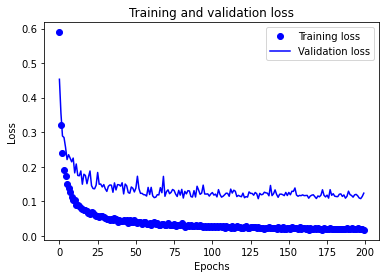

In [26]:
import matplotlib.pyplot as plt 
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(200)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [28]:
y_pred = network.predict(X_test)

In [29]:
def denorm(x):
    return (x * Y_std) + Y_mean

In [30]:
y_pred = denorm(y_pred)

In [31]:
y_true = denorm(Y_test)

In [32]:
y_pred = y_pred.flatten()

In [33]:
y_pred.shape

(309,)

In [34]:
y_true.shape

(309,)

(0.0, 100.0)

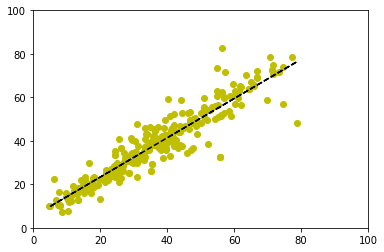

In [35]:
import numpy as np
import matplotlib.pyplot as plt
coef = np.polyfit(y_true,y_pred,1)
poly1d_fn = np.poly1d(coef) 
# poly1d_fn is now a function which takes in x and returns an estimate for y
plt.plot(y_true,y_pred, 'yo', y_true, poly1d_fn(y_true), '--k')
plt.xlim(0, 100)
plt.ylim(0, 100)